In [1]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import ariel_gp
import gp
import ariel_model
import tqdm
import copy

local


In [39]:
train_data = kgs.load_all_train_data()
model_base = ariel_model.baseline_model()

In [51]:
def plot_samples_for_model_options(model_options):
    
    model = ariel_gp.PredictionModel()
    model.run_in_parallel = False
    model.model_options = model_options
    model.model_options.n_iter=0
    model.model_options.use_training_labels = False
    model.train(train_data)
    model.infer(train_data[0:1]);    
    obs = copy.deepcopy(model.results['model_mean'].m['signal'].m['main'].m['transit'].obs_wavelength)
    model_samples = gp.sample_from_prior(model.results['model_mean'].m['signal'].m['main'].m['transit'].depth_model.m['variation'], obs, n_samples=30)    
    #print('sigma', model.results['model_mean'].m['signal'].m['main'].m['transit'].depth_model.m['variation'].m['non_pca'].model_FGS.sigma)
    obs.labels = model_samples.get_prediction(obs)
    vals = obs.labels
    plot_vals(vals)
def plot_vals(vals):
    plt.figure()
    plt.plot(vals)
    plt.title(str(np.std(vals[0,:])) + ' ' + str(np.std(vals[1:,:])))
    plt.pause(0.001)    
    print(vals.shape)

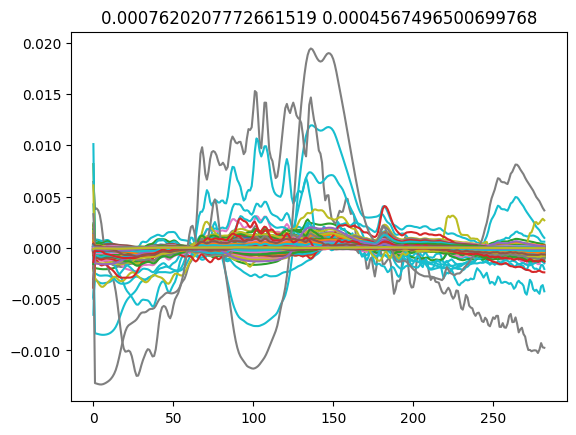

(283, 1099)


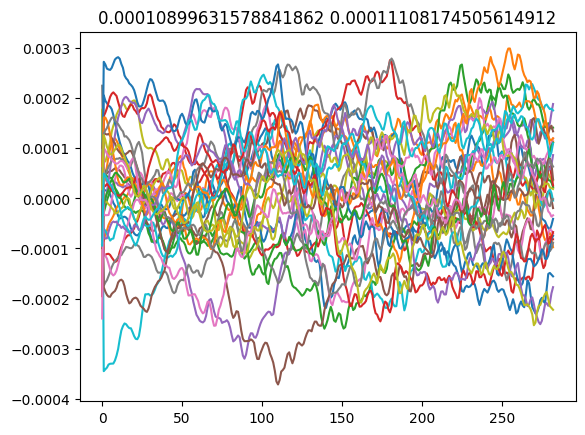

(283, 30)
(2, 283)
[1.34131230e-06 1.13783288e-06]
(1099, 283)
0.09384165915882792
0.9724778344109761
not training!


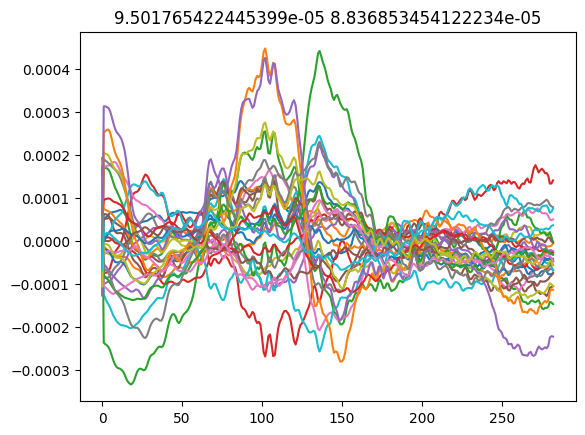

(283, 30)


In [53]:
import ariel_pca

spectra = [d.spectrum for d in train_data]
vals = (spectra-np.mean(spectra,1)[:,None]).T
plot_vals(vals)

importlib.reload(ariel_pca)
model = copy.deepcopy(model_base)
plot_samples_for_model_options(model.model.model_options)

model_pca = ariel_pca.PCA(model=model, n_components=2)
model_pca.model_options_link = model_pca.model.model.model_options
model_pca.train(train_data)
plot_samples_for_model_options(model_pca.model.model.model_options)

In [5]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [6]:
model_pca.model.model.model_options.transit_pca_components.shape

(4, 283)